## k-최근접 이웃 회귀
지도학습은 크게 분류와 **회귀(regression)**으로 나뉜다. 회귀는 결과값으로 임의의 수치를 출력한다

k-최근접 이웃 회귀는 k-최근접 이웃 분류와 비슷하게, 예측하려는 샘플과 가장 가까운 샘플 k개를 선택하고 이 샘플들의 평균값을 출력한다


## 데이터 준비


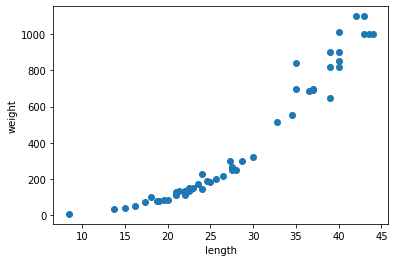

In [1]:
import numpy as np
perch_length = np.array(
    [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 35.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
)
perch_weight = np.array(
    [  5.9,  32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 훈련셋과 테스트셋으로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

현재 데이터셋을 만든 perch 데이터가 모두 1차원이므로, 훈련셋과 테스트셋은 1차원 배열로 되어있다. 그러나 사이킷런에서 사용하는 배열은 2차원이므로, 이를 바꿔주어야 한다
현재 모양은 [1, 2, 3]이고, 이 사이즈는 하나의 튜플, (3,)으로 나타낸다. 이를

[[1],

 [2],

 [3]]

 형태로 만들어야 하고, 이 사이즈는 (3, 1)로 나타낼 수 있다. 이렇게 바꿀 수 있는 쉬운 방법 중 하나는 reshape() 메서드를 사용하는 것이다. 예를 들면 다음과 같다

In [2]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [3]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [6]:
# 물론 4개짜리 1차원 배열을 (2, 3)으로 만들 수는 없다
# 자리에 -1을 넣으면 알아서 자동으로 채우라는 말이다
# ex) 8개짜리 1차원을 (4, -1) -> (4, 2)와 같다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [8]:
# k-최근접 이웃 회귀로 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


## 결정계수
결정계수 또는 R^2라고 한다. 회귀에서 점수로 사용하는 값인데, 식은 다음과 같다
$$R^2 = 1 - \frac{Σ(target - prediction)^2}{Σ(target - standard)^2}$$

따라서 타깃의 평균 정도를 예측한다면 R^2는 0에 가깝고, 타깃에 가까운 예측을 한다면 1에 가까운 숫자가 나온다

R^2로 직관적인 정확도를 알기 어려우므로 타깃과 예측한 값의 오차를 구해보도록 하자

In [9]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [10]:
print(knr.score(test_input, test_target))

0.992809406101064


In [11]:
print(knr.score(train_input, train_target))

0.9699779067036656


In [12]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9822918760601117


In [13]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 과대 적합 vs 과소 적합
훈련셋 점수 > 테스트셋 점수이면 **과대적합(overfitting)**이라 하고, 훈련셋 점수 < 테스트셋 점수이거나 두 점수 모두 낮으면 **과소적합(underfitting)**이라 한다. 위 결과를 보면 훈련 점수가 더 낮은데, 이는 언더피팅을 의미하므로 모델을 조금 더 복잡하게 할 필요가 있다. 여기서 모델을 복잡하게 하는 것은 이웃의 개수 k를 줄이는 것이다. k를 줄일 수록 국지적인 패턴에 민감해지고, 늘릴 수록 일반적인 패턴을 따르기 때문이다. 따라서 k를 기본 5에서 3으로 줄임으로써 언더피팅을 해결했다고 볼 수 있다